<a href="https://colab.research.google.com/github/cinthia005/Lab-PDI/blob/main/AF6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD FUNDAMENTAL 6 - PROCESAMIENTO DIGITAL DE IMAGENES**
CINTHIA JANETH PECINA HERNANDEZ 2062979 IB:

Umbral óptimo calculado por Otsu: 0.0


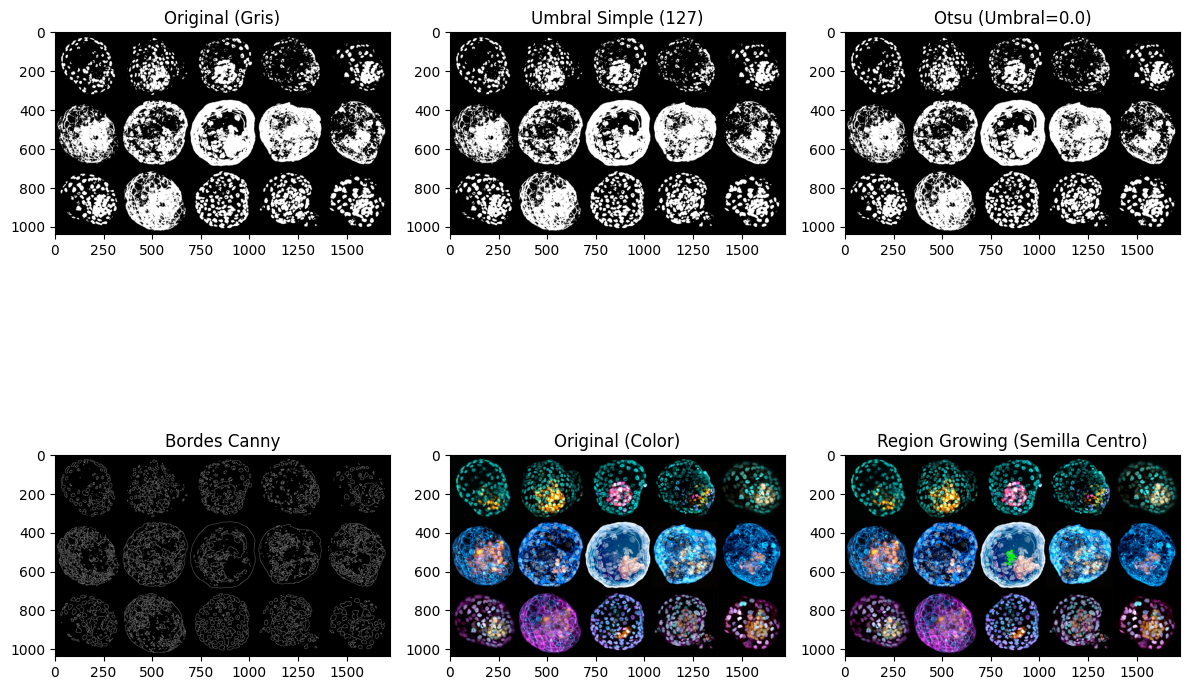

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# CONFIGURACIÓN Y CARGA
# ==========================================
archivo_gris = 'embriones_P2.tif'  # Imagen para Otsu/Canny
archivo_color = 'embriones.jpg'    # Imagen para Region Growing

img_gris = cv2.imread(archivo_gris, 0) # Cargar en Grises
img_color = cv2.imread(archivo_color)  # Cargar en Color (BGR)

if img_gris is None or img_color is None:
    print("Error: No se encontraron las imágenes. Verifica los nombres.")
else:
    # Convertir a RGB para mostrar bien con matplotlib
    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

    # ==========================================
    # TÉCNICA 1: UMBRALIZACIÓN SIMPLE
    # ==========================================
    # Definimos umbral arbitrario de 127 (mitad de 0-255)
    # Todo lo mayor a 127 es blanco, lo menor es negro.
    ret, thresh_simple = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)

    # ==========================================
    # TÉCNICA 2: MÉTODO DE OTSU
    # ==========================================
    # El flag THRESH_OTSU calcula el umbral óptimo automáticamente.
    # 'val_otsu' guarda el valor que el algoritmo decidió usar.
    val_otsu, thresh_otsu = cv2.threshold(img_gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"Umbral óptimo calculado por Otsu: {val_otsu}")

    # ==========================================
    # TÉCNICA 3: DETECCIÓN DE BORDES (CANNY)
    # ==========================================
    # Detecta cambios bruscos (gradientes).
    # Umbrales 50 y 150 para la histéresis.
    bordes_canny = cv2.Canny(img_gris, 50, 150)

    # ==========================================
    # TÉCNICA 4: REGION GROWING (FLOOD FILL)
    # ==========================================
    # Usaremos la imagen a color.
    img_region = img_color.copy()
    h, w = img_color.shape[:2]

    # 1. Definir Semilla (Punto de inicio)
    # Pongo el centro de la imagen, asumiendo que el objeto está ahí.
    seed_point = (w // 2, h // 2)

    # 2. Definir Máscara (necesaria para floodFill, debe ser h+2, w+2)
    mask = np.zeros((h + 2, w + 2), np.uint8)

    # 3. Criterios de tolerancia (loDiff, upDiff)
    # Cuánto puede variar el color respecto a la semilla para ser aceptado.
    tolerance = (30, 30, 30) # Tolerancia +/- 30 en cada canal RGB

    # 4. Aplicar FloodFill
    # Pinta de verde (0, 255, 0) la región conectada similar a la semilla
    cv2.floodFill(img_region, mask, seed_point, (0, 255, 0), tolerance, tolerance, cv2.FLOODFILL_FIXED_RANGE)

    # Convertir resultado a RGB para visualización
    img_region_rgb = cv2.cvtColor(img_region, cv2.COLOR_BGR2RGB)

    # ==========================================
    # VISUALIZACIÓN DE RESULTADOS
    # ==========================================
    plt.figure(figsize=(12, 10))

    # Fila 1: Imagen Gris y sus segmentaciones
    plt.subplot(231), plt.imshow(img_gris, cmap='gray'), plt.title('Original (Gris)')
    plt.subplot(232), plt.imshow(thresh_simple, cmap='gray'), plt.title('Umbral Simple (127)')
    plt.subplot(233), plt.imshow(thresh_otsu, cmap='gray'), plt.title(f'Otsu (Umbral={val_otsu})')

    # Fila 2: Bordes y Region Growing
    plt.subplot(234), plt.imshow(bordes_canny, cmap='gray'), plt.title('Bordes Canny')
    plt.subplot(235), plt.imshow(img_rgb), plt.title('Original (Color)')
    plt.subplot(236), plt.imshow(img_region_rgb), plt.title('Region Growing (Semilla Centro)')

    plt.tight_layout()
    plt.show()